In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn
seaborn.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2 Linear Regression

## 2.1 Explore Raw Dataset

### 2.1.1 Read the raw data with pandas.read_csv()

In [2]:
df = pd.read_csv('imports-85.data',
                 header=None,
                 names=['Symboling', 'Losses', 'Make', 'Fuel_Type', 'Aspiration', 'Num_of_Doors',
                        'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Wheel_Base', 'Length',
                        'Width', 'Height', 'Curb_Weight', 'Engine_Type', 'Num_of_Cylinders',
                        'Engine_Size', 'Fuel_System', 'Bore', 'Stroke', 'Compression_Ratio',
                        'Horsepower', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'Price'],
                 na_values=('?'))

In [3]:
df.head(3)

,Symboling,Losses,Make,Fuel_Type,Aspiration,Num_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_Ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [4]:
df.isnull().sum()[df.isnull().sum() != 0]

Losses          41
Num_of_Doors     2
Bore             4
Stroke           4
Horsepower       2
Peak_rpm         2
Price            4
dtype: int64

### 2.1.2 Data cleaning: remove the data sample with missing values

In [5]:
df.dropna(axis=0, how='any', inplace=True)

### 2.1.3 Data Standardization

In [6]:
split_idx = int(df.shape[0] * .2)
df_train, df_test = df[split_idx:], df[:split_idx]

In [7]:
engine_size_stdscaler = StandardScaler()
df_train.loc[:, 'Std_Engine_Size'] = engine_size_stdscaler.fit_transform(
    df_train.Engine_Size.values.reshape(-1, 1))
df_test.loc[:, 'Std_Engine_Size'] = engine_size_stdscaler.transform(
    df_test.Engine_Size.values.reshape(-1, 1))
price_stdscaler = StandardScaler()
df_train.loc[:, 'Std_Price'] = price_stdscaler.fit_transform(
    df_train.Price.values.reshape(-1, 1))
df_test.loc[:, 'Std_Price'] = price_stdscaler.transform(
    df_test.Price.values.reshape(-1, 1))
horsepower_stdscaler = StandardScaler()
df_train.loc[:, 'Std_Horsepower'] = horsepower_stdscaler.fit_transform(
    df_train.Horsepower.values.reshape(-1, 1))
df_test.loc[:, 'Std_Horsepower'] = horsepower_stdscaler.transform(
    df_test.Horsepower.values.reshape(-1, 1))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
X_train, X_test, y_train, y_test = df_train['Std_Horsepower'], df_test[
    'Std_Horsepower'], df_train['Std_Price'], df_test['Std_Price']

### 2.1.4 Linear regression on the preprocessed data

In [9]:
lin_reg = linear_model.LinearRegression().fit(
    X_train.values.reshape(-1, 1), y_train)

In [10]:
lin_reg.score(X_train.values.reshape(-1, 1), y_train)

0.551814313382951

In [11]:
test_pred = lin_reg.predict(X_test.values.reshape(-1, 1))

#### Figure 1: Linear regression on clean and standardized test data

In [12]:
true = plt.scatter(X_test, y_test, c='k', marker='.')
pred = plt.scatter(X_test, test_pred, c='b', marker='x')
plt.legend([true, pred], ['True', 'Prediction'])
plt.xlabel('Standardized horsepower')
plt.ylabel('Standardized price')
plt.title('Linear regression on clean and standardized test data')

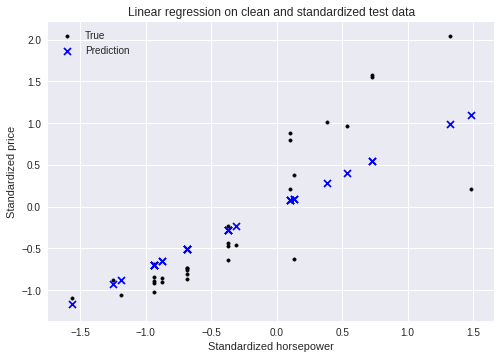

In [13]:
plt.show()

## 2.2 Linear regression with multiple features

In [14]:
Xm_train, ym_train = df[['Engine_Size', 'Horsepower', 'Peak_rpm']], df['Price']

In [15]:
engine_size_stdscaler = StandardScaler()
Xm_train.loc[:, 'Std_Engine_Size'] = engine_size_stdscaler.fit_transform(
    Xm_train.Engine_Size.values.reshape(-1, 1))
horsepower_stdscaler = StandardScaler()
Xm_train.loc[:, 'Std_Horsepower'] = horsepower_stdscaler.fit_transform(
    Xm_train.Horsepower.values.reshape(-1, 1))
peak_rpm_stdscaler = StandardScaler()
Xm_train.loc[:, 'Std_Peak_rpm'] = peak_rpm_stdscaler.fit_transform(
    Xm_train.Peak_rpm.values.reshape(-1, 1))
price_stdscaler = StandardScaler()
ym_train = price_stdscaler.fit_transform(ym_train.values.reshape(-1, 1))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
X_matrix = Xm_train[['Std_Horsepower',
                     'Std_Engine_Size', 'Std_Peak_rpm']].values
bias_vector = np.ones((X_matrix.shape[0], 1))
X_unit = np.append(bias_vector, X_matrix, axis=1)

In [17]:
X_unit_t = np.transpose(X_unit)
theta = np.dot(np.dot(np.linalg.inv(
    np.dot(X_unit_t, X_unit)), X_unit_t), ym_train)

### Solve multiple linear regression with normal equation.

##### Add scripts to lr_mfeature.py to print out the calculated theta with the following format:

In [18]:
print('Parameter theta calculate by normal equation: (%.4f, %.4f, %.4f, %.4f)' %
      (theta[0][0], theta[1][0], theta[2][0], theta[3][0]))

Parameter theta calculate by normal equation: (0.0000, 0.2260, 0.6575, -0.0015)


### Solve multiple linear regression with gradient descent.

#### Without changing the parameters:

In [19]:
sgd_reg = linear_model.SGDRegressor(loss='squared_loss').fit(
    X_matrix, ym_train.reshape(ym_train.shape[0],))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


##### Add scripts to lr_mfeature.py to print out the calculated theta with the following format:

In [20]:
print('Parameter theta calculated by SGD: (%.4f, %.4f, %.4f, %.4f)' %
      (sgd_reg.intercept_[0], sgd_reg.coef_[0], sgd_reg.coef_[1], sgd_reg.coef_[2]))

Parameter theta calculated by SGD: (0.0001, 0.3746, 0.4775, -0.0681)


#### With changing the parmaters:

The under model is turned off l2_penalty and increased the iteration.

In [21]:
sgd_reg_tuned = linear_model.SGDRegressor(loss='squared_loss', penalty='none', max_iter=1e6).fit(
    X_matrix, ym_train.reshape(ym_train.shape[0],))

In [22]:
print('Parameter theta calculated by SGD: (%.4f, %.4f, %.4f, %.4f)' %
      (sgd_reg_tuned.intercept_[0], sgd_reg_tuned.coef_[0], sgd_reg_tuned.coef_[1], sgd_reg_tuned.coef_[2]))

Parameter theta calculated by SGD: (0.0000, 0.2260, 0.6576, -0.0015)


#### Benchmark model by sklearn:

In [23]:
lin_reg_bm = linear_model.LinearRegression().fit(X_matrix, ym_train)

In [24]:
print('Parameter theta calculate by Sklearn: (%.4f, %.4f, %.4f, %.4f)' %
      (lin_reg_bm.intercept_[0], lin_reg_bm.coef_[0][0], lin_reg_bm.coef_[0][1], lin_reg_bm.coef_[0][2]))

Parameter theta calculate by Sklearn: (0.0000, 0.2260, 0.6575, -0.0015)


## 2.3 Polynomial Regression with Regularization

### 2.3.1 Polynomial regression on training data

In [25]:
X_train = [[5.3], [7.2], [10.5], [14.7], [18], [20]]
y_train = [[7.5], [9.1], [13.2], [17.5], [19.3], [19.5]]

In [26]:
X_test = [[6], [8], [11], [22]]
y_test = [[8.3], [12.5], [15.4], [19.6]]

In [27]:
poly = PolynomialFeatures(degree=5, include_bias=False) #order 5 feature constructor
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [28]:
poly_reg = linear_model.LinearRegression().fit(X_train_poly, y_train)

##### Fill in the blank of the regression equation below

In [29]:
print('y1 = %.4f + %.4f x + %.4f x*x + %.4f x*x*x + %.4f x*x*x*x + %.4f x*x*x*x*x' %
      (poly_reg.intercept_[0], poly_reg.coef_[0][0], poly_reg.coef_[0][1], poly_reg.coef_[0][2], poly_reg.coef_[0][3], poly_reg.coef_[0][4]))

y1 = 18.2339 + -6.0512 x + 1.1119 x*x + -0.0799 x*x*x + 0.0027 x*x*x*x + -0.0000 x*x*x*x*x


##### Add scripts to poly_regular.py to print the score of the linear regression model on the test data in the following format:

In [30]:
print('Linear regression (order 5) score is: ', poly_reg.score(X_test_poly, y_test))

Linear regression (order 5) score is:  0.8567469916481851


In [31]:
xx = np.linspace(0, 26, 100)
xx_poly = poly.transform(xx.reshape(xx.shape[0], 1))
yy_poly = poly_reg.predict(xx_poly)

##### Add script to poly_regular.py to plot the predicted output yy_poly versus xx, and also the test data (y_test versus X_test) in the same plot.

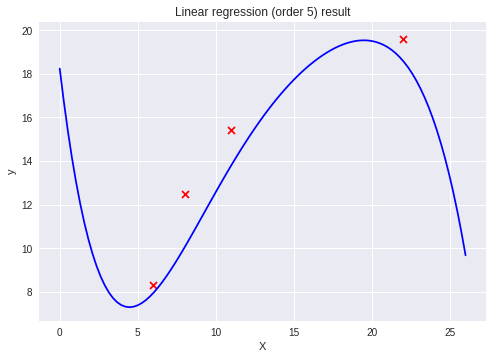

In [32]:
plt.plot(xx, yy_poly, c='b')
plt.scatter(X_test, y_test, c='r', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear regression (order 5) result')
plt.show()

### 2.3.2 Ridge Regression (with regularization)

In [33]:
ridge_model = linear_model.Ridge(alpha=1., normalize=False)
ridge_model.fit(X_train_poly, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

##### Fill in the blank of the regression equation below

In [34]:
print('y1 = %.4f + %.4f x + %.4f x*x + %.4f x*x*x + %.4f x*x*x*x + %.4f x*x*x*x*x' %
      (ridge_model.intercept_[0], ridge_model.coef_[0][0], ridge_model.coef_[0][1], ridge_model.coef_[0][2], ridge_model.coef_[0][3], ridge_model.coef_[0][4]))

y1 = 5.7687 + -0.0029 x + 0.0124 x*x + 0.0143 x*x*x + -0.0011 x*x*x*x + 0.0000 x*x*x*x*x


##### Add scripts to poly_regular.py to print the score of the linear regression model on the test data in the following format:

In [35]:
print('Ridge regression (order 5) score is: ', ridge_model.score(X_test_poly, y_test))

Ridge regression (order 5) score is:  0.8706689045767595


In [36]:
yy_ridge = ridge_model.predict(xx_poly)

##### Add script to poly_regular.py to plot the predicted output yy_poly versus xx, and also the test data (y_test versus X_test) in the same plot.

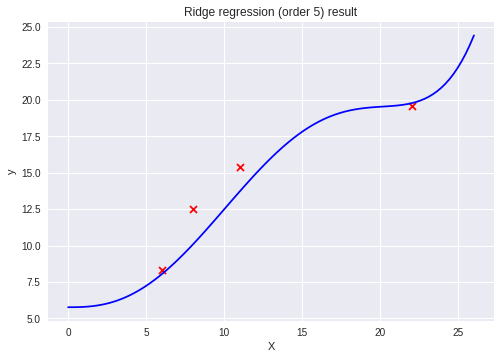

In [37]:
plt.plot(xx, yy_ridge, c='b')
plt.scatter(X_test, y_test, c='r', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge regression (order 5) result')
plt.show()

### Benchmark (simple linear regression):

In [38]:
benchmark = linear_model.LinearRegression().fit(X_train, y_train)

In [39]:
print('Linear regression score is: ', benchmark.score(X_test, y_test))

Linear regression score is:  0.7175894154356046


### 2.3.3 Comparisions

#### Q1. Which model has the highest score?

Ridge regression (the score is 0.8706).

#### Q2. Does a larger alpha result in a larger coefficient for x^5 in the regression equation in Ridge model (order 5)?

No, the coefficient for x^5 is nearly zero.

# 3 Linear Discrimination / Classification

In [40]:
n_samples = 10000

centers = [(-1, -1), (1, 1)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.8,
                  centers=centers, shuffle=False, random_state=42)

y[:n_samples // 2] = 0
y[n_samples // 2:] = 1

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = linear_model.LogisticRegression()

## 3.1 Binary Classification

In [42]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
test_pred = log_reg.predict(X_test)

In [44]:
(sum(test_pred == 1) + sum(test_pred == 0)) == len(test_pred)

True

### Q: Does the predictions of X_test contain values other than 0 or 1?

No.

### Add scripts to logistic_clf.py to plot the data points in X_test using the function scatter() with different colors for different predicted classes.

In [45]:
colors = 'br'
for i, color in zip(log_reg.classes_, colors):
    idx = np.where(test_pred == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, cmap=plt.cm.Paired)

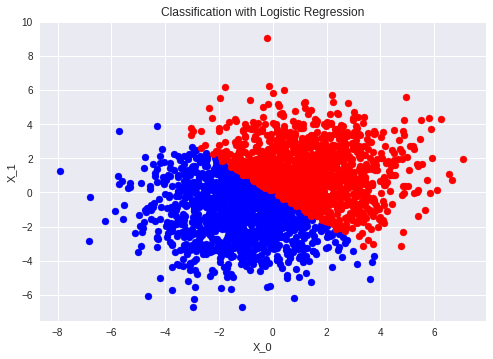

In [46]:
plt.title('Classification with Logistic Regression')
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

### Scatter plot of the true labels

In [47]:
colors = 'br'
for i, color in zip(log_reg.classes_, colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, cmap=plt.cm.Paired)

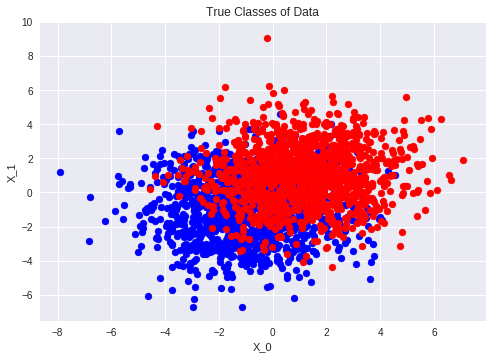

In [48]:
plt.title('True Classes of Data')
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

## 3.2 Classification Statistics

### Q: How many wrong predictions does the LogisticRegression estimator make on the test data?

In [49]:
print('Number of wrong predictions is: ', sum(y_test != test_pred))

Number of wrong predictions is:  567


##### Number of wrong predictions can also be calculated by the score.

In [50]:
print('Score: ', log_reg.score(X_test, y_test))

Score:  0.7732


In [51]:
print('Number of wrong predictions is: ', (1-0.7072) * len(X_test))

Number of wrong predictions is:  731.9999999999999
